In [1]:
using SpinTrack
using Plots

┌ Info: Precompiling SpinTrack [f20f1cdb-64eb-4dd1-8e50-747921795544]
└ @ Base loading.jl:1342


# Advanced Example

In [64]:
# You need to install PyPlot package
# Optional line
pyplot(thickness_scaling=1.2)

Plots.PyPlotBackend()

In [78]:
# use regular matplotlib if needed
import PyPlot as plt

In [20]:
# this array contains accelerator elements
ring_elements = vcat([get_symmetric_hybrid_FODO() for i in 1:24]...)

192-element Vector{RingElement}:
 ElectricBendingSection
  R0: Float64 95.49
  Ex: Float64 4.391124128962333e6
  length: Float64 12.499611770470388
  curvature: Bool true
  particle: Particle
  n: Float64 1.0
  is_Ey_compensated: Bool false
  Ey: Float64 0.0
  Δx: Float64 0.0
  Δy: Float64 0.0

 Drift(1.88)
 MagneticQuadrupole(0.20488, 0.0, 0.0, 0.4)
 Drift(1.88)
 ElectricBendingSection
  R0: Float64 95.49
  Ex: Float64 4.391124128962333e6
  length: Float64 12.499611770470388
  curvature: Bool true
  particle: Particle
  n: Float64 1.0
  is_Ey_compensated: Bool false
  Ey: Float64 0.0
  Δx: Float64 0.0
  Δy: Float64 0.0

 Drift(1.88)
 MagneticQuadrupole(-0.20488, 0.0, 0.0, 0.4)
 Drift(1.88)
 ElectricBendingSection
  R0: Float64 95.49
  Ex: Float64 4.391124128962333e6
  length: Float64 12.499611770470388
  curvature: Bool true
  particle: Particle
  n: Float64 1.0
  is_Ey_compensated: Bool false
  Ey: Float64 0.0
  Δx: Float64 0.0
  Δy: Float64 0.0

 Drift(1.88)
 MagneticQuadrupole(0.20

In [3]:
ring_elements[1] 

ElectricBendingSection
  R0: Float64 95.49
  Ex: Float64 4.391124128962333e6
  length: Float64 12.499611770470388
  curvature: Bool true
  particle: Particle
  n: Float64 1.0
  is_Ey_compensated: Bool false
  Ey: Float64 0.0
  Δx: Float64 0.0
  Δy: Float64 0.0


In [4]:
ring_elements[5]

ElectricBendingSection
  R0: Float64 95.49
  Ex: Float64 4.391124128962333e6
  length: Float64 12.499611770470388
  curvature: Bool true
  particle: Particle
  n: Float64 1.0
  is_Ey_compensated: Bool false
  Ey: Float64 0.0
  Δx: Float64 0.0
  Δy: Float64 0.0


In [21]:
# Define a new element
mutable struct DriftLongB <: RingElement
    length::Float64
    Bs::Float64
end

function SpinTrack.getFields(u, p, t, element::DriftLongB)
    B = SA[0.0, 0.0, element.Bs]

    # E, B, V
    return zeros(SVector{3}), B, 0.0
end

SpinTrack.getCurvature(ringElement::DriftLongB) = 0.0

In [6]:
function modified_hybrid_ring(Δx, Bₛ)
    ring_elements = vcat([get_symmetric_hybrid_FODO() for i in 1:24]...)
    
    # Misalign the plates
    ring_elements[1].Δx = +Δx 
    ring_elements[5].Δx = -Δx
    
    # Change drifts to modified DriftLongB
    ring_elements[4] = DriftLongB(ring_elements[4].length, +Bₛ)
    ring_elements[8] = DriftLongB(ring_elements[8].length, -Bₛ)

    return symmetric_hybrid_ring(ring_elements)
end

modified_hybrid_ring (generic function with 1 method)

In [7]:
modified_hybrid_ring(0, 0)

RingParameters{Float64, Union{DriftLongB, Drift, ElectricBendingSection, MagneticQuadrupole}}
  particle: Particle
  ring: RingStructure{Union{DriftLongB, Drift, ElectricBendingSection, MagneticQuadrupole}}
  region_change_function!: change_region! (function of type typeof(change_region!))
  element_index: Int64 1
  verbose: Bool false
  alg: OrdinaryDiffEq.Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}
  save_positions: Bool false
  starting_time: Float64 0.0
  turns: Float64 500.0
  saving_time_step: Float64 79.96613649825782
  internal_max_time_step: Float64 1.0
  state_tolerance_rel: Float64 1.0e-12
  state_tolerance_abs: Float64 1.0e-14
  if_EDM_on: Bool false
  η: Float64 1.9e-15
  RF_on: Bool false
  RF_phase: Float64 0.0
  cyclotron_freq: Float64 224331.89075717534
  RF_omega: Float64 1.1276150719498402e8
  RF_voltage: Float64 1890.0
  is_losing_energy: Bool false
  beam_current: Float64 3.594193106710059e-14
  ring_impedan

In [8]:
p = modified_hybrid_ring(1e-2, 1e-9);

In [10]:
p.ring.ringElements[4]

DriftLongB(1.88, 1.0e-9)

In [11]:
p.state_tolerance_abs = 1e-17

1.0e-17

In [12]:
sol_cw = get_solution(u0_long, p);
sol_cc = get_solution(u0_long, p, cw=false);

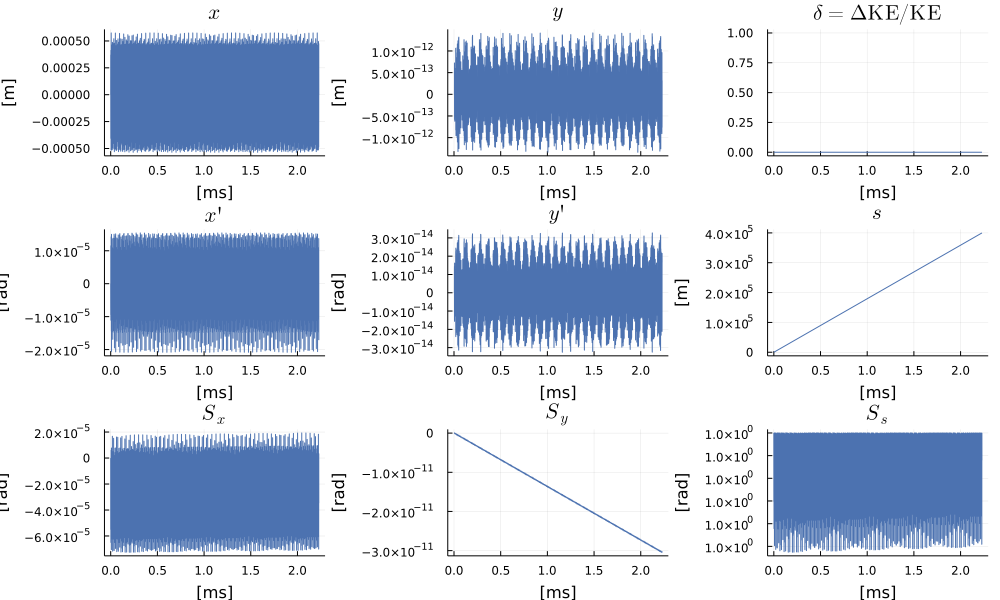

In [13]:
plot(sol_cw)

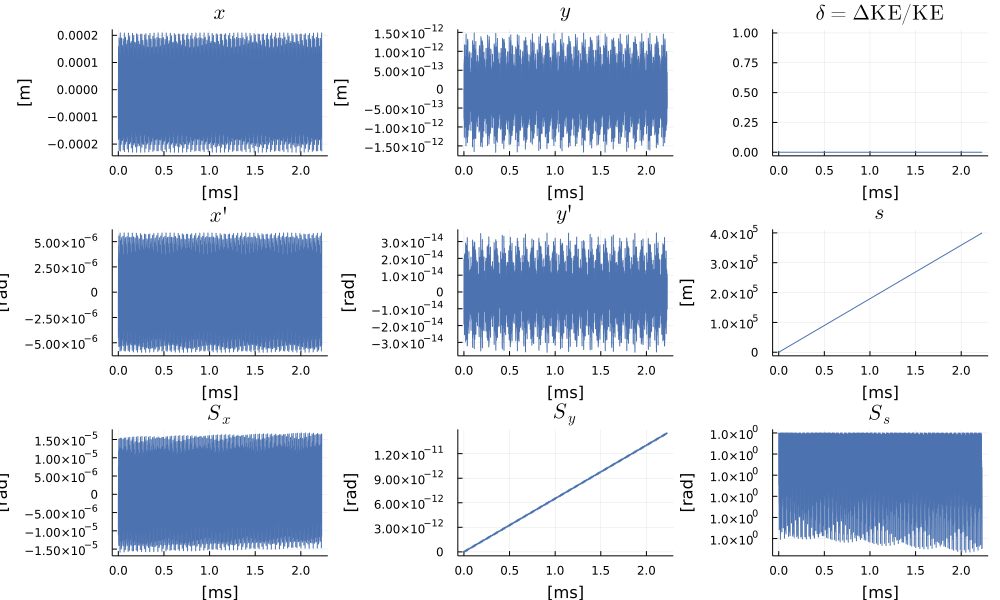

GKS: Possible loss of precision in routine SET_WINDOW


In [14]:
plot(sol_cc)

In [15]:
get_vert_precession_rate(sol_cw)

-1.366363e-8 ± 1.6e-13

In [16]:

get_hor_precession_rate(sol_cw)

0.000846 ± 5.6e-5

In [17]:

get_vert_precession_rate(sol_cc)

6.512214e-9 ± 3.8e-14

In [18]:
get_hor_precession_rate(sol_cc)

0.000544 ± 1.8e-5

In [72]:
plate_misalignments = 10.0 .^ range(-2, stop=-4, length=10)
b_s_values = 10.0 .^ range(-9, stop=-6, length=10);

In [73]:
function get_precession_xb(x, b)
    # x = xb[1]
    # b = xb[2]
    p = modified_hybrid_ring(x, b);
    sol= get_solution(u0_long, p);
    return log10(abs(get_vert_precession_rate(sol).val))
end

get_precession_xb (generic function with 2 methods)

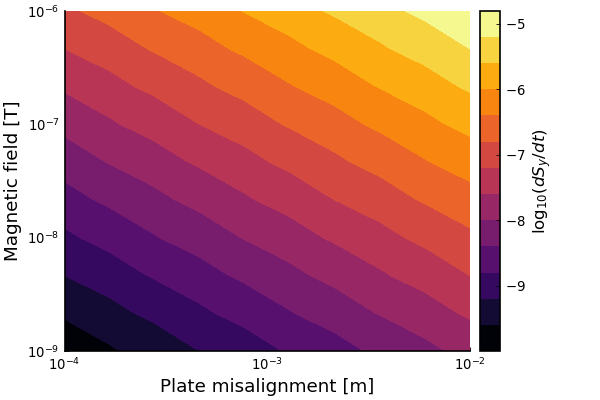

In [79]:
contourf(plate_misalignments, b_s_values, get_precession_xb,
    xscale=:log10, yscale=:log10, xlabel="Plate misalignment [m]", ylab="Magnetic field [T]", colorbartitle=L"\log_{10}({dS_y/dt})")